# Basic gap statistic functionality

This notebook demonstrates how to esimate the number of clusters for K-Means using the gap statistic. For background see [Tibshirani et al, 2001](https://web.stanford.edu/~hastie/Papers/gap.pdf).


### Notation
- WCSS: within class sum of squares i.e. equation 2 from (Tibshirani et al, 2001)

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from clustering.GapStat import GapStat

%matplotlib inline

# sample some toy data with 3 clusters

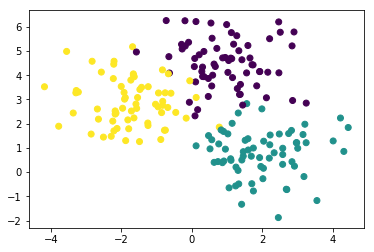

In [2]:
X, y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y)

# use the gap statistics to estimate the number of clusters

The arguments to GapSat include

- **clusterer**: which clustering algorith to use. The user can select one of the algorithms which comes with the package (e.g. sklearn's K-Means implementation) or they can provide their own clustering algorithm. See documentation.

- **cluster_sizes**: list of number of clusters to evaluate

- **ref_dist**: which null reference distribution to use (either 'uniform' or 'svd')

- **B**: how many samples to draw from the null reference distribution to estimated the expected log within class sum of squares (WCSS)

In [3]:
# initialize a GapStat object
gs = GapStat(clusterer='kmeans',
             cluster_sizes=range(1, 11),
             ref_dist='uniform',
             B=10)

estimate_n_clusters() runs everything. 
- for each value of n_cluster in cluster_sizes

    - cluster the data set X and compute the WCSS (called obs_wcss for observed wcss)

    - sample B the null reference datasets, cluster them and compute their WCSS (called null_wcss)

In [4]:
# run everything
gs.estimate_n_clusters(X)

In [5]:
# the estimated number of clusters can be accessed via
gs.est_n_clusters

3

## some visualizations

While the gap statistic does provide a point estimate for the number of clusters, it is suggested the user look at the WCSS and gap statistic curves (e.g. see fig 1 from Tibshirani et al 2001)

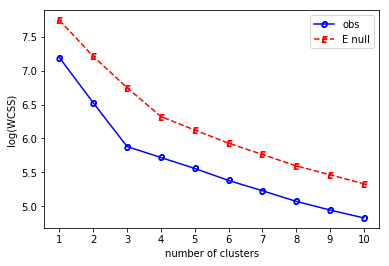

In [6]:
gs.plot_wcss_curves()

WCSS plot (above)
- the red dashed line show the estimated expected value of log(WCSS) for the null reference distribution

- the blue solid shows the observed log(WCSS) of the given data set

- x axis indicated the number of clusters

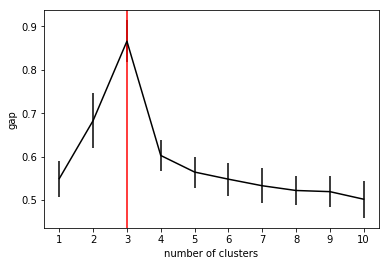

In [7]:
gs.plot_gap()

- x axis indicated the number of clusters
- y axis plots the gap statistic i.e. $E^*$log(null WCSS) - log(obs WCSS) (where $E^*$ indicates this is an estimate)
- error bars show one standard error for the estimated null WCSS
- the red vertical line shows the estimated number of clusters